In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image
import warnings
import platform
import os
warnings.filterwarnings("ignore")
import patoolib

In [5]:
ds_path = 'E:\\MEGA\\VTCA\\AI_Specialist\\AI_Workspace\\3. Dataset\\'
if platform.system().lower() == 'linux':
    ds_path = '/home/pep/drive/MEGA/VTCA/AI_Specialist/AI_Workspace/3. Dataset/'

fold_name = 'AI Specialist Lesson 01'

path = ds_path + fold_name
os.chdir(ds_path)

if not os.path.exists(path):
    patoolib.extract_archive(f"{fold_name}.zip")

os.chdir(path)

patool: Extracting AI Specialist Lesson 01.zip ...
patool: running /usr/bin/7z x -o./Unpack_61dhqo5x -- "AI Specialist Lesson 01.zip"
patool: ... AI Specialist Lesson 01.zip extracted to `AI Specialist Lesson 01'.


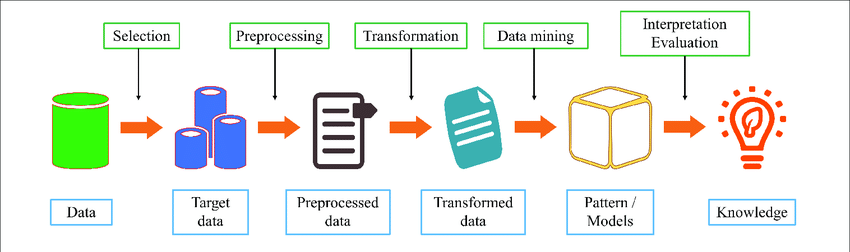

In [6]:
display(Image(filename='Data Mining Process 01.png'))

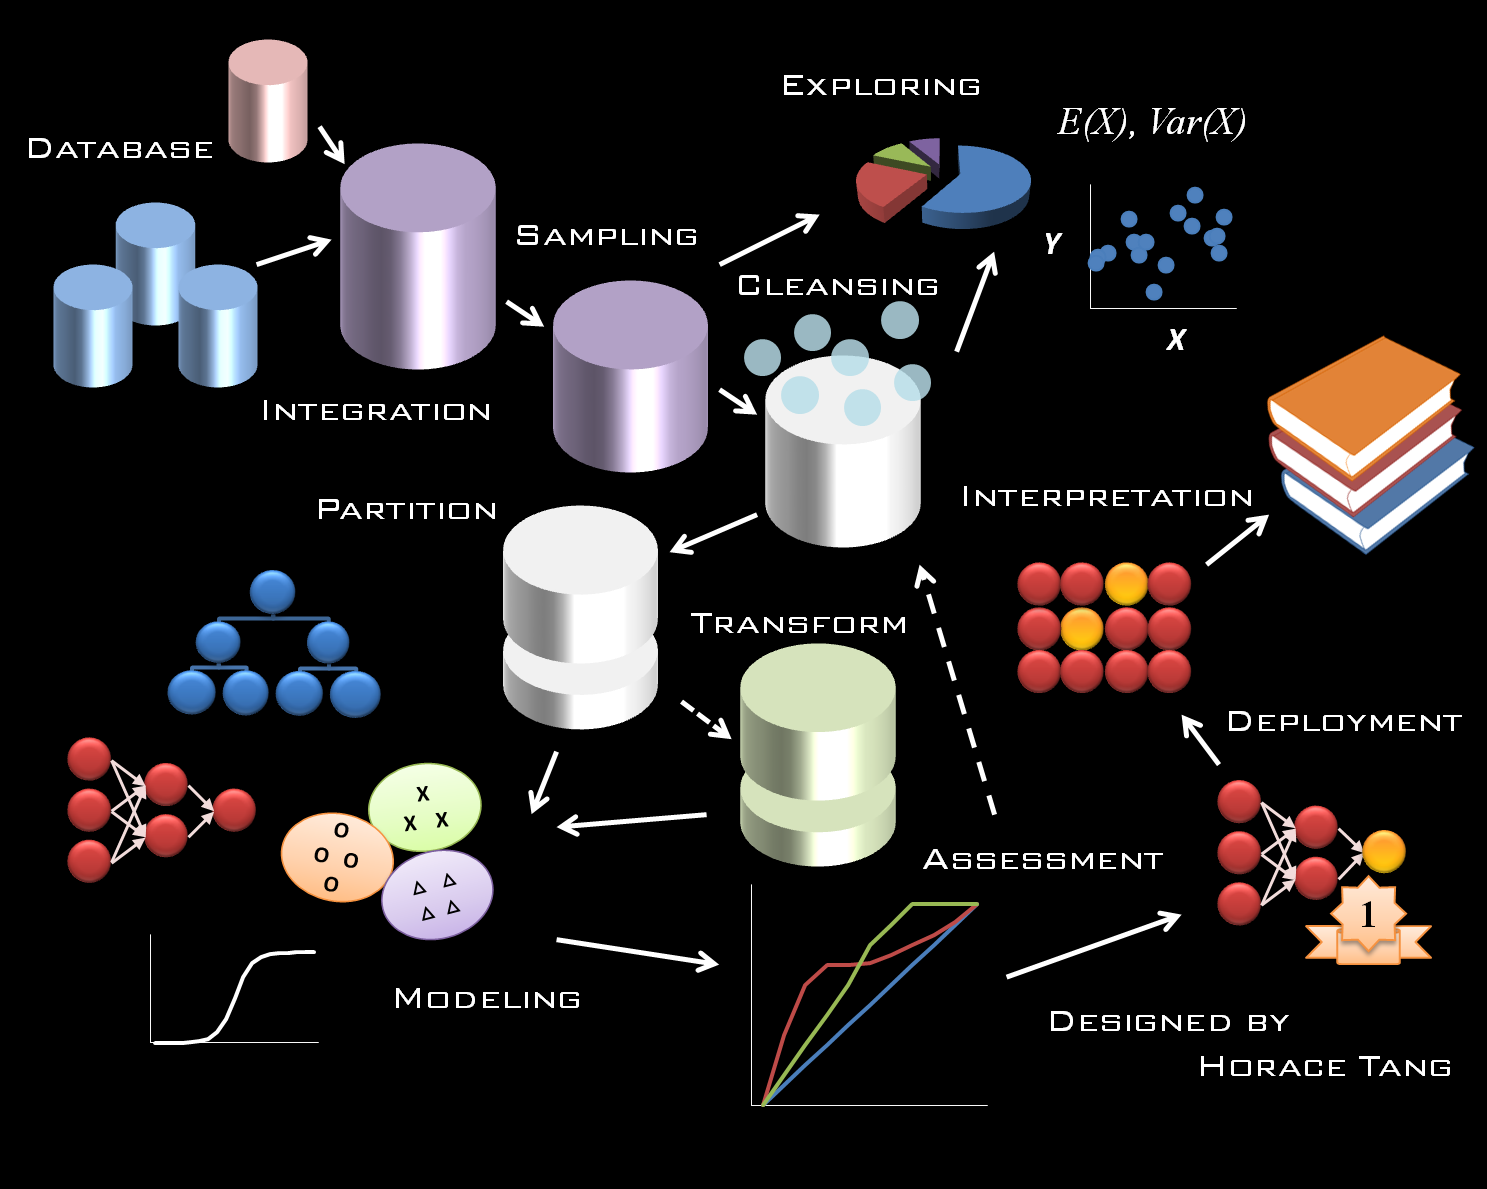

In [7]:
display(Image(filename='Data Mining Process 02.png'))

## Integration Step

In [3]:
data = pd.read_csv('Humidity_Temp_Prediction.csv', delimiter=";", parse_dates=["date_time"])
display(data.head(50))
data.shape

,id,temp,humidity,date_time
0,9197,21,20,2016-08-17 00:00:01
1,9198,21,20,2016-08-17 00:01:01
2,9199,21,20,2016-08-17 00:02:01
3,9200,21,20,2016-08-17 00:03:01
4,9201,21,20,2016-08-17 00:04:01
5,9202,21,20,2016-08-17 00:05:02
6,9203,21,20,2016-08-17 00:06:01
7,9204,21,20,2016-08-17 00:07:01
8,9205,20,21,2016-08-17 00:08:01
9,9206,21,20,2016-08-17 00:09:01


(619999, 4)

## Exploring Step

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619999 entries, 0 to 619998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         619999 non-null  int64         
 1   temp       619999 non-null  int64         
 2   humidity   619999 non-null  int64         
 3   date_time  619999 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 18.9 MB


## Feature Engineering (Data sampling and Data Integration)

In [5]:
data["minute"] = data["date_time"].dt.minute
data["hour"] = data["date_time"].dt.hour
data["day_of_week"] = data["date_time"].dt.day_name()
data["month"] = data["date_time"].dt.month

# Transform minute a bit
data["minute"] = data["minute"] + data["hour"] * 60
# Drop "id" column
data.drop("id", axis=1, inplace=True)

data.head()

,temp,humidity,date_time,minute,hour,day_of_week,month
0,21,20,2016-08-17 00:00:01,0,0,Wednesday,8
1,21,20,2016-08-17 00:01:01,1,0,Wednesday,8
2,21,20,2016-08-17 00:02:01,2,0,Wednesday,8
3,21,20,2016-08-17 00:03:01,3,0,Wednesday,8
4,21,20,2016-08-17 00:04:01,4,0,Wednesday,8


In [6]:
# Exploring
NumStatDF = data.describe(include=[np.number])
CatStatDF = data.describe(exclude=[np.number])

display(NumStatDF)
display(CatStatDF)

,temp,humidity,minute,hour,month
count,619999.000000,619999.000000,619999.000000,619999.000000,619999.000000
mean,19.365405,41.340391,715.723067,11.436893,7.460789
std,1.523185,32.418998,417.192832,6.946960,3.360717
min,15.000000,16.000000,0.000000,0.000000,1.000000
25%,18.000000,20.000000,354.000000,5.000000,5.000000
50%,19.000000,21.000000,711.000000,11.000000,8.000000
75%,20.000000,95.000000,1079.000000,17.000000,10.000000
max,28.000000,95.000000,1439.000000,23.000000,12.000000


,date_time,day_of_week
count,619999,619999
unique,619985,7
top,2017-11-04 17:43:33,Thursday
freq,3,91761
first,2016-08-17 00:00:01,NaN
last,2017-12-17 03:17:02,NaN


In [7]:
np.unique(data["day_of_week"])

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [8]:
data["day_of_week"].value_counts()

Thursday     91761
Wednesday    90486
Friday       90365
Saturday     89407
Tuesday      88178
Monday       84953
Sunday       84849
Name: day_of_week, dtype: int64

In [9]:
# Exploring
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if (is_string_dtype(data[col])):
        print(col, "**" * 30)
        print(data[col].value_counts())
        print("**" * 30)
    else:
        print(col, "**" * 30)
        print([data[col].min(), data[col].max])

temp ************************************************************
[15, <bound method NDFrame._add_numeric_operations.<locals>.max of 0         21
1         21
2         21
3         21
4         21
          ..
619994    18
619995    18
619996    18
619997    19
619998    19
Name: temp, Length: 619999, dtype: int64>]
humidity ************************************************************
[16, <bound method NDFrame._add_numeric_operations.<locals>.max of 0         20
1         20
2         20
3         20
4         20
          ..
619994    21
619995    21
619996    21
619997    20
619998    20
Name: humidity, Length: 619999, dtype: int64>]
date_time ************************************************************
[Timestamp('2016-08-17 00:00:01'), <bound method NDFrame._add_numeric_operations.<locals>.max of 0        2016-08-17 00:00:01
1        2016-08-17 00:01:01
2        2016-08-17 00:02:01
3        2016-08-17 00:03:01
4        2016-08-17 00:04:01
                 ...        
619994   201

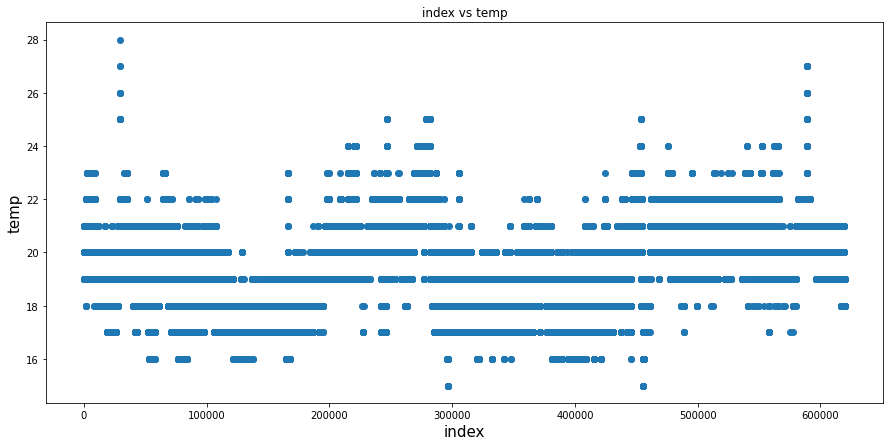

In [10]:
# Exploring data ==> Explain why do data partition

feature_y = "temp"
feature_x = "index"
plt.figure(figsize=(15, 7))
plt.scatter(data.index, data[feature_y])
plt.title(f"{feature_x} vs {feature_y}")
plt.xlabel(feature_x, size=15)
plt.ylabel(feature_y, size=15)
plt.show()

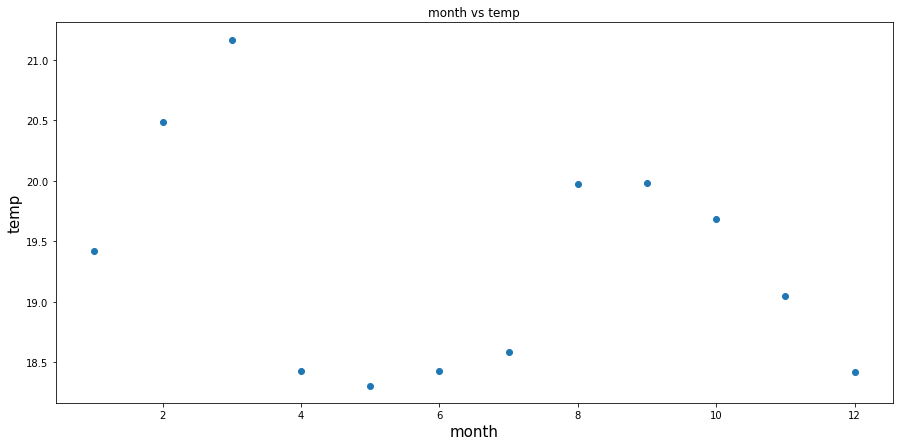

In [11]:
feature_y = "temp"
feature_x = "month"
plt.figure(figsize=(15, 7))
data_group = data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index=False).mean()
plt.scatter(data_group[feature_x], data_group[feature_y])
plt.title(f"{feature_x} vs {feature_y}")
plt.xlabel(feature_x, size=15)
plt.ylabel(feature_y, size=15)
plt.show()

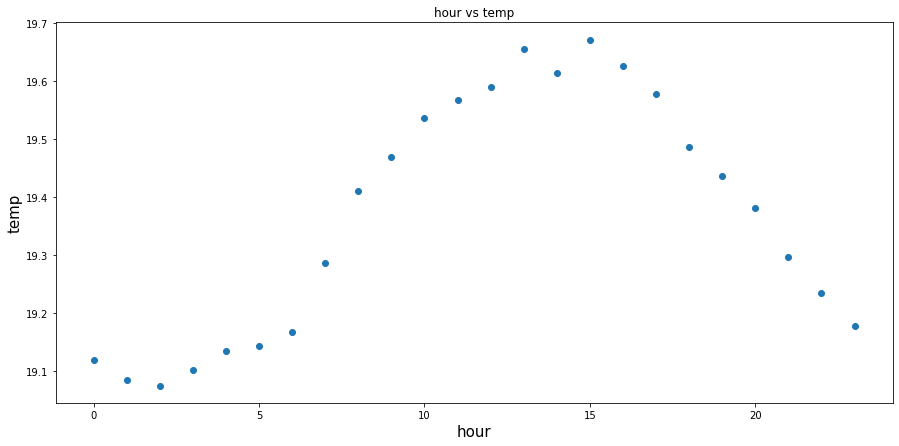

In [12]:
feature_y = "temp"
feature_x = "hour"
plt.figure(figsize=(15, 7))
data_group = data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index=False).mean()
plt.scatter(data_group[feature_x], data_group[feature_y])
plt.title(f"{feature_x} vs {feature_y}")
plt.xlabel(feature_x, size=15)
plt.ylabel(feature_y, size=15)
plt.show()

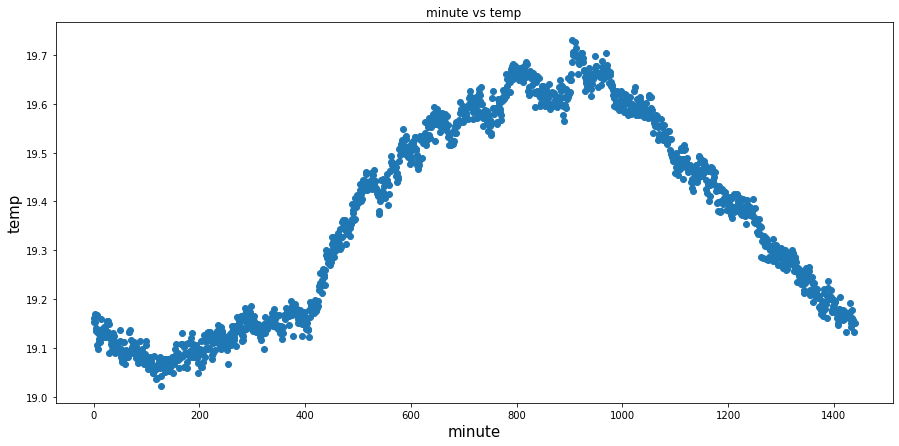

In [13]:
feature_y = "temp"
feature_x = "minute"
plt.figure(figsize=(15, 7))
data_group = data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index=False).mean()
plt.scatter(data_group[feature_x], data_group[feature_y])
plt.title(f"{feature_x} vs {feature_y}")
plt.xlabel(feature_x, size=15)
plt.ylabel(feature_y, size=15)
plt.show()

In [18]:
data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index=False).mean()

,hour,temp
0,0,19.118611
1,1,19.083789
2,2,19.074765
3,3,19.102233
4,4,19.135009
5,5,19.143692
6,6,19.167604
7,7,19.286310
8,8,19.410452
9,9,19.469362


In [26]:
# Data partition
feature_x = "minute"
feature_y = "temp"
data_group = data.loc[:, [feature_x, feature_y]].groupby(feature_x, as_index=False).mean()

X = data_group[[feature_x]].values
y = data_group[feature_y].values

print(X)
print(y)

[[   0]
 [   1]
 [   2]
 ...
 [1437]
 [1438]
 [1439]]
[19.16173121 19.15331808 19.16968326 ... 19.15789474 19.13211845
 19.15068493]


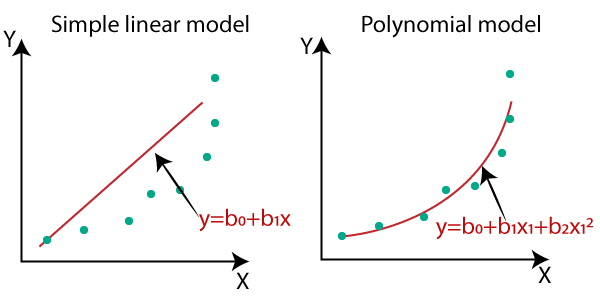

In [21]:
display(Image(filename='Polynomial Feature Model 01.png'))

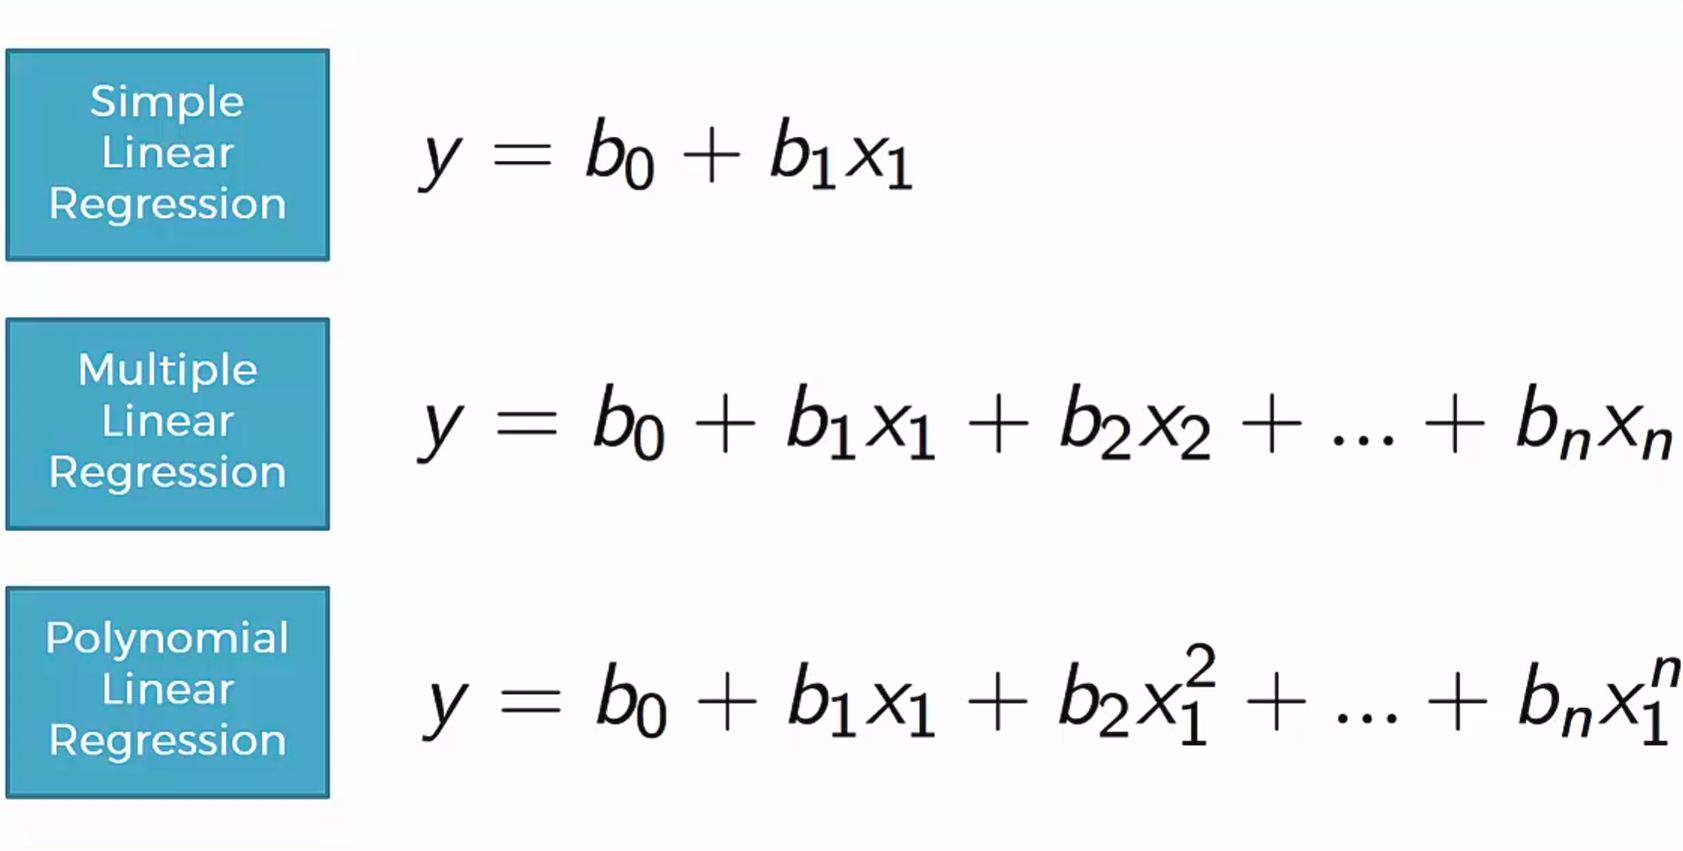

In [22]:
display(Image(filename='Polynomial Feature Model 02.png'))

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
print(X_poly[:10])

[[  1.   0.   0.   0.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   3.   9.  27.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]
 [  1.   6.  36. 216.]
 [  1.   7.  49. 343.]
 [  1.   8.  64. 512.]
 [  1.   9.  81. 729.]]


In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

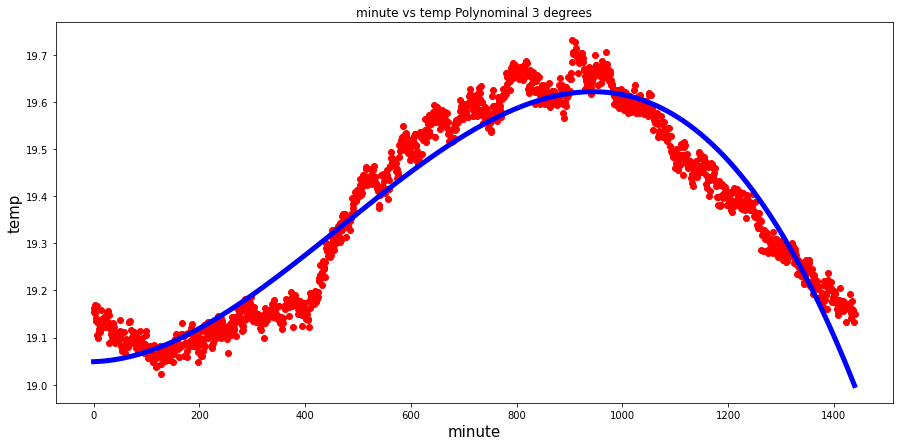

In [32]:
y_predict = lin_reg.predict(poly_reg.fit_transform(X))

plt.figure(figsize=(15, 7))
plt.scatter(X, y, color="red")
plt.plot(X, y_predict, color='blue', linewidth=5)
plt.title(f"{feature_x} vs {feature_y} Polynominal 3 degrees")
plt.xlabel(feature_x, size=15)
plt.ylabel(feature_y, size=15)
plt.show()

In [33]:
y_predict_degree3 = y_predict.copy()

[[1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]]


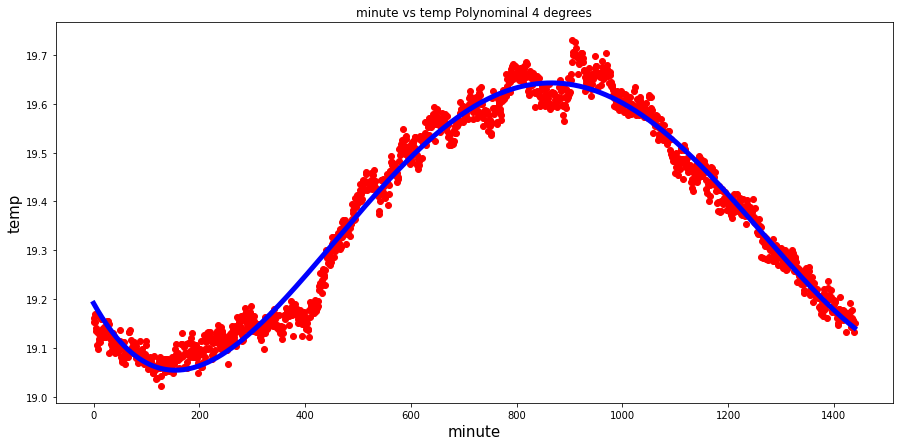

In [39]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
print(X_poly[:10])

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

y_predict = lin_reg.predict(poly_reg.fit_transform(X))

plt.figure(figsize=(15, 7))
plt.scatter(X, y, color="red")
plt.plot(X, y_predict, color='blue', linewidth=5)
plt.title(f"{feature_x} vs {feature_y} Polynominal 4 degrees")
plt.xlabel(feature_x, size=15)
plt.ylabel(feature_y, size=15)
plt.show()

y_predict_degree4 = y_predict.copy()

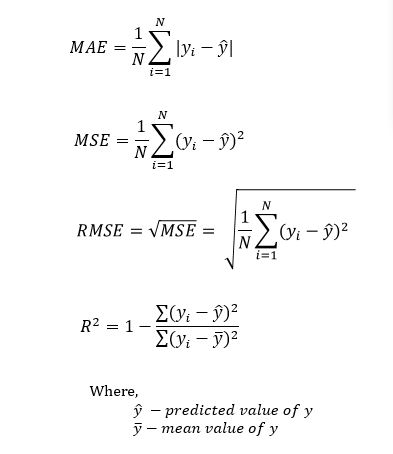

In [40]:
display(Image(filename='Measurement Accuracy.JPG'))

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

R2 = r2_score(y, y_predict_degree3)
MSE = mean_squared_error(y, y_predict_degree3)
MAE = mean_absolute_error(y, y_predict_degree3)

print(f'3 Degrees ==> R2 = {R2}, MSE = {MSE}, MAE =  {MAE}')

R2 = r2_score(y, y_predict_degree4)
MSE = mean_squared_error(y, y_predict_degree4)
MAE = mean_absolute_error(y, y_predict_degree4)

print(f'4 Degrees ==> R2 = {R2}, MSE = {MSE}, MAE =  {MAE}')

3 Degrees ==> R2 = 0.9219979879947402, MSE = 0.003317080740700908, MAE =  0.04773533863713583
4 Degrees ==> R2 = 0.9757174492156215, MSE = 0.0010326295369986382, MAE =  0.025148564018684757


<Figure size 1440x360 with 0 Axes>

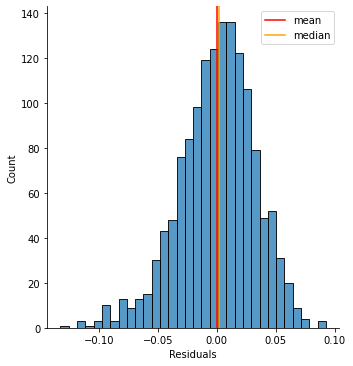

In [43]:
# Model Assessment
residuals = y - y_predict
plt.figure(figsize=(20,5))
sns.displot(residuals)
plt.axvline(x = np.mean(residuals), color = 'red', label = 'mean')
plt.axvline(x = np.median(residuals), color = 'orange', label = 'median')
plt.xlabel("Residuals")
plt.legend(loc = "upper right")
plt.show()

In [46]:
std = np.std(residuals)

In [44]:
y_predict

array([19.19123175, 19.18928943, 19.1873632 , ..., 19.14239875,
       19.14153535, 19.14067664])

In [47]:
y_predict + 3*std

array([19.28763541, 19.2856931 , 19.28376686, ..., 19.23880241,
       19.23793901, 19.2370803 ])

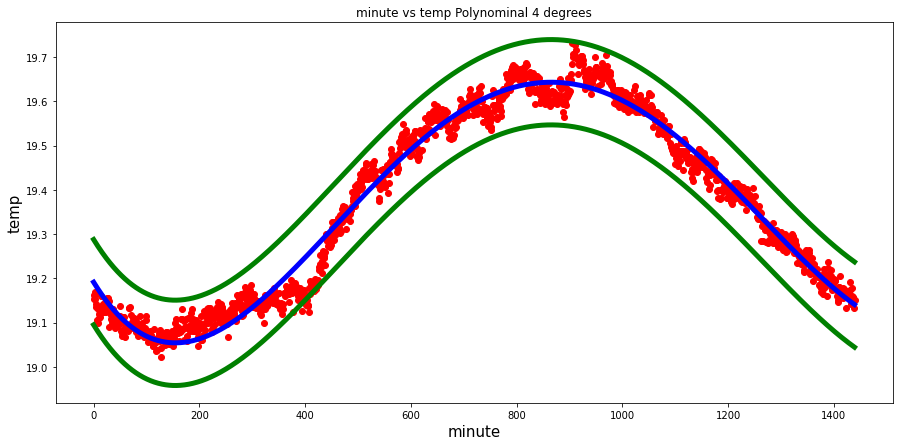

In [48]:
y_pred_upper = y_predict + 3*std
y_pred_lower = y_predict - 3*std

plt.figure(figsize=(15, 7))
plt.scatter(X, y, color="red")
plt.plot(X, y_predict, color='blue', linewidth=5)
plt.plot(X, y_pred_upper, color='green', linewidth=5)
plt.plot(X, y_pred_lower, color='green', linewidth=5)
plt.title(f"{feature_x} vs {feature_y} Polynominal 4 degrees")
plt.xlabel(feature_x, size=15)
plt.ylabel(feature_y, size=15)
plt.show()